# Basic Libraries

In [1]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit import *
from qiskit.visualization import *
# Loading your IBM Q account(s)
provider = IBMQ.load_account()

import math
import random

from qiskit.providers.aer.noise import NoiseModel
from qiskit.aqua import QuantumInstance
from qiskit.providers.aer.noise import thermal_relaxation_error, ReadoutError, depolarizing_error

# provider = IBMQ.get_provider(hub='ibm-q')
# machine = provider.get_backend('ibmq_valencia')
from qiskit.test.mock import FakeLondon
machine = FakeLondon()
machine_noise_model = NoiseModel.from_backend(machine)
simulator = Aer.get_backend('qasm_simulator')


basis_gates = machine_noise_model.basis_gates

C:\Users\Eesh Gupta\anacondaaa\lib\site-packages\qiskit\providers\ibmq\ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


# Important Functions

In [2]:
#Local Hamiltonian Function
from VQEHamiltonian_funcs import circs, Hammifier

#Readout Mit Functions
#from ReadoutMit import prepare_circuit, modify_counts, symmetry

# Expectation Value/Running Functions
from Result_ReadoutMit_funcs import binaryToDecimal, dictToList, sampleExpecVal, countToEig, expecValForSamples, addDicts, prepare_circuit_normal, prepare_circuit, modify_counts, symmetry, evaluator

# Noise Model

In [3]:
'''

def generateDepolarizingError(machine, gate, qubits)

def generateRelaxationError(machine, gate, qubits, t1, t2, amp = 1, custom_t = False):
    """
    Return a relaxation error
    """

def generateNoiseModel(machine, coherent = True, incoherent = False, readout = False, custom_t = False, t1 = None, t2 = None, reverse = False):
    """
    Returns a realistic copy of london noise model with custom t1, t2 times
    """

'''

from NoiseModel import generateDepolarizingError, generateRelaxationError, generateNoiseModel

In [4]:
 noise_model = generateNoiseModel(machine, coherent = False, incoherent = False, readout= True)

Original: 0.01 0.050000000000000044
Reverse: 0.01 0.050000000000000044
Original: 0.02 0.07666666666666666
Reverse: 0.02 0.07666666666666666
Original: 0.14 0.18999999999999995
Reverse: 0.14 0.18999999999999995
Original: 0.0033333333333332993 0.03
Reverse: 0.0033333333333332993 0.03
Original: 0.006666666666666667 0.043333333333333335
Reverse: 0.006666666666666667 0.043333333333333335


# Variational Form
For Hydrogen

In [5]:
from qiskit.chemistry.components.variational_forms import UCCSD
from qiskit.chemistry.components.initial_states import HartreeFock

initial_state = HartreeFock(
4,
2,
'parity'
) 
var_form = UCCSD(
            num_orbitals=4,
            num_particles=2,
            initial_state=initial_state,
            qubit_mapping='parity'
        )

# Running Circuits for different Param

In [6]:
counter = 0

def EnergyFinder(param):
    '''
    Input: param (1D array) for which to compute energy on VQE circ of H2
    Output: energy
    '''
    
    Hamiltonian = """II\nIZ\nZI\nZZ\nXX"""
    Hamiltonian_weights = [-1.053, 0.395, -0.395, -0.011, 0.181]
    backend = simulator
    global noise_model
    samples = 8192
    
    
    
    circ = var_form.construct_circuit(param).decompose()
    circuits = Hammifier(circ, Hamiltonian)
    circs_nr = circs(circuits)
    circs_r = circs(circuits)
    circs_ideal = circs(circuits)
    #print('no mit')
    noisy_r = evaluator(circs_r, samples, noise_model, Hamiltonian, Hamiltonian_weights, simulator, readout_mit = False)
    #print('mit')
    noisy_nr = evaluator(circs_nr, samples, noise_model, Hamiltonian, Hamiltonian_weights, simulator, readout_mit = True)
    #print('no mit')
    ideal = evaluator(circs_ideal, samples, None, Hamiltonian, Hamiltonian_weights, simulator, False)
    #print('done')
    return noisy_r, noisy_nr, ideal

def main():
    '''
    Choose param and compute mean
    '''
    d = -math.pi
    u = math.pi
    
    energies = []
    diff_r = []
    diff_nr = []
    params = []
    
    for i in range(1000):
        print(i)
    
        p1 = random.uniform(d, u)
        p2 = random.uniform(d, u)
        p3 = random.uniform(d, u)


        noisy_r,noisy_nr, ideal = EnergyFinder([p1,p2,p3])
        energies.append([[p1,p2,p3], ideal, noisy_r, noisy_nr])
        diff_r.append(noisy_r-ideal)
        diff_nr.append(noisy_nr-ideal)
        
        print('Noisy diff is ' + str(noisy_r-ideal))
        print('Mitigated diff is ' + str(noisy_nr-ideal))
        
    return energies, diff_r, diff_nr
energies, diff_r, diff_nr = main()

0
Noisy diff is 0.03007690429687515
Mitigated diff is 0.02172117620335401
1
Noisy diff is -0.02790502929687501
Mitigated diff is -0.005394172775598366
2
Noisy diff is 0.002093505859375011
Mitigated diff is 0.024235972556089724
3
Noisy diff is -0.01639062500000002
Mitigated diff is 0.02577031393699819
4
Noisy diff is -0.05679711914062496
Mitigated diff is 0.014872600744524567
5
Noisy diff is 0.006302734374999952
Mitigated diff is 0.0008346586681547974
6
Noisy diff is -0.013569824218749998
Mitigated diff is 0.004088001440814282
7
Noisy diff is 0.01042163085937503
Mitigated diff is 0.0020180858444827088
8
Noisy diff is 0.013316894531249956
Mitigated diff is 0.003353453799889272
9
Noisy diff is -0.05209204101562501
Mitigated diff is -0.0034759824051816546
10
Noisy diff is -0.018833007812500004
Mitigated diff is 0.02246534103374924
11
Noisy diff is -0.038685302734374996
Mitigated diff is 0.001767225238953729
12
Noisy diff is -0.0064399414062500104
Mitigated diff is -0.005627987733878903
13


Noisy diff is -0.00654077148437493
Mitigated diff is 0.01924479293869824
108
Noisy diff is 0.054427490234374876
Mitigated diff is 0.0178495182172429
109
Noisy diff is 0.036717285156249946
Mitigated diff is 0.007606313255971497
110
Noisy diff is 0.015273681640624981
Mitigated diff is 0.010588555796417098
111
Noisy diff is -0.029783935546875
Mitigated diff is 0.0044528650881708876
112
Noisy diff is -0.04346679687499999
Mitigated diff is -0.002596184967376375
113
Noisy diff is 0.01003710937500002
Mitigated diff is 0.004619606397253506
114
Noisy diff is -0.010655029296875007
Mitigated diff is 0.013934756026308781
115
Noisy diff is 0.009787109375000047
Mitigated diff is 0.006311600415286445
116
Noisy diff is -0.010141357421875052
Mitigated diff is -0.005081702450110692
117
Noisy diff is 0.031376708984374946
Mitigated diff is 0.025201198408783765
118
Noisy diff is 0.020314941406249953
Mitigated diff is -0.000336560222546578
119
Noisy diff is -0.023452636718749996
Mitigated diff is 0.01326893

Noisy diff is -0.0051623535156249956
Mitigated diff is 0.015439544301434127
214
Noisy diff is 0.0005554199218749944
Mitigated diff is 0.013912297235099957
215
Noisy diff is 0.005443115234375018
Mitigated diff is 0.025638531173687418
216
Noisy diff is -0.0033544921874999467
Mitigated diff is 0.025356527328724177
217
Noisy diff is 0.01933325195312502
Mitigated diff is 0.010528836197439662
218
Noisy diff is -0.060917724609375
Mitigated diff is 0.00707228011423483
219
Noisy diff is 0.009993408203124998
Mitigated diff is 0.007564561618697341
220
Noisy diff is -0.016428222656250012
Mitigated diff is 0.009657617366357604
221
Noisy diff is 0.020764892578125027
Mitigated diff is 0.024547316718654566
222
Noisy diff is 0.026028564453124958
Mitigated diff is 0.017947064589056705
223
Noisy diff is 0.01891357421874984
Mitigated diff is 0.005631830899062384
224
Noisy diff is 0.02169433593750003
Mitigated diff is 0.008771804649343684
225
Noisy diff is -0.003021240234375
Mitigated diff is -0.0028881638

Noisy diff is 0.03449731445312498
Mitigated diff is 0.02287899473569721
319
Noisy diff is 0.014935302734375044
Mitigated diff is 0.004526589865212927
320
Noisy diff is 0.0037062988281250098
Mitigated diff is 0.0032310586049598133
321
Noisy diff is -0.04632128906249999
Mitigated diff is 0.017242759019816922
322
Noisy diff is -0.007272216796874981
Mitigated diff is -0.015206851557730466
323
Noisy diff is -0.034229248046874994
Mitigated diff is 0.014733019497863264
324
Noisy diff is 0.013263916015625044
Mitigated diff is 0.017626199419070565
325
Noisy diff is 0.01839184570312502
Mitigated diff is 0.012026776940675
326
Noisy diff is 0.005502685546874969
Mitigated diff is 0.008194440211481219
327
Noisy diff is -0.023594238281250013
Mitigated diff is -0.003520343084649727
328
Noisy diff is -0.0018056640624999343
Mitigated diff is 0.024200746708379794
329
Noisy diff is 0.0032102050781249725
Mitigated diff is 0.022802940831689156
330
Noisy diff is -0.02531152343750001
Mitigated diff is 0.01825

Noisy diff is -0.007722167968749916
Mitigated diff is 0.005279860613561227
425
Noisy diff is 0.03335986328125007
Mitigated diff is 0.013158319680536379
426
Noisy diff is 0.0011560058593750033
Mitigated diff is 0.025272731310573116
427
Noisy diff is -0.018135009765625015
Mitigated diff is 0.012711194041418655
428
Noisy diff is -0.05731933593749999
Mitigated diff is 0.016026283839858046
429
Noisy diff is -0.035773681640624985
Mitigated diff is 0.011304103768410415
430
Noisy diff is -0.05549072265624999
Mitigated diff is 0.0077975993732829485
431
Noisy diff is 0.02186767578125004
Mitigated diff is 0.012996528016254616
432
Noisy diff is -0.0063974609374999325
Mitigated diff is 0.022630768098004406
433
Noisy diff is -0.04491796874999998
Mitigated diff is 0.004994639519763561
434
Noisy diff is 0.006952392578125022
Mitigated diff is 0.028262271300747877
435
Noisy diff is 0.044245605468750004
Mitigated diff is 0.02613328981131735
436
Noisy diff is 0.010734619140625012
Mitigated diff is 0.00046

Noisy diff is -0.00466406250000001
Mitigated diff is 0.00013179629073178933
530
Noisy diff is 0.06360546875000006
Mitigated diff is 0.02582368707127114
531
Noisy diff is 0.0011237792968749605
Mitigated diff is 0.015398539699787828
532
Noisy diff is -0.031962646484374996
Mitigated diff is 0.017653596442731873
533
Noisy diff is -0.013613037109374976
Mitigated diff is 0.004783404722131068
534
Noisy diff is 0.032234619140624976
Mitigated diff is 0.017593008873721727
535
Noisy diff is -0.01910986328125
Mitigated diff is -0.007105269562251965
536
Noisy diff is -0.02435937499999999
Mitigated diff is 0.018461839598118895
537
Noisy diff is 0.022765380859375073
Mitigated diff is 0.008889011030421945
538
Noisy diff is -0.011376953124999992
Mitigated diff is 0.017317749038344127
539
Noisy diff is -0.012790527343749969
Mitigated diff is -0.030595934088172738
540
Noisy diff is 0.011774414062500016
Mitigated diff is 0.017356114981797177
541
Noisy diff is 0.03931689453124998
Mitigated diff is 0.024300

Noisy diff is -0.016902343749999937
Mitigated diff is 0.007309907351181866
636
Noisy diff is 0.051125732421875014
Mitigated diff is 0.00829681883871336
637
Noisy diff is 0.007559326171875103
Mitigated diff is 0.012426646384214812
638
Noisy diff is 0.00612402343750007
Mitigated diff is 0.004755125373409108
639
Noisy diff is -0.02557006835937503
Mitigated diff is 0.009543770985958468
640
Noisy diff is 0.02895434570312494
Mitigated diff is 0.016669308870383093
641
Noisy diff is -0.006967529296874997
Mitigated diff is 0.01793522832052713
642
Noisy diff is -0.041113525390625
Mitigated diff is 0.009280749496813949
643
Noisy diff is 0.012233398437500043
Mitigated diff is 0.0024488578607259615
644
Noisy diff is 0.04732958984374991
Mitigated diff is 0.0144320608294356
645
Noisy diff is 0.017674072265625063
Mitigated diff is 0.026359407671321777
646
Noisy diff is -0.028039550781250006
Mitigated diff is 0.022042558450663913
647
Noisy diff is -0.04289550781250001
Mitigated diff is 0.01838734062437

Noisy diff is 0.02854711914062502
Mitigated diff is 0.003042779734056422
741
Noisy diff is -0.016485351562499986
Mitigated diff is -0.0016055997195647403
742
Noisy diff is -0.015150878906249998
Mitigated diff is 0.025202139315762373
743
Noisy diff is -0.011410644531249958
Mitigated diff is 0.0059478516221191935
744
Noisy diff is -0.05343188476562494
Mitigated diff is 0.013216472725408324
745
Noisy diff is -0.038297119140625
Mitigated diff is -0.008589958159245292
746
Noisy diff is -0.0012866210937499956
Mitigated diff is 0.006090583683894202
747
Noisy diff is 0.032208007812499995
Mitigated diff is 0.014638433338579726
748
Noisy diff is 0.016387939453125
Mitigated diff is 0.02715122618809146
749
Noisy diff is -0.01895898437500001
Mitigated diff is -0.006591754962702229
750
Noisy diff is -0.016029296875
Mitigated diff is 0.01997350582360348
751
Noisy diff is 0.053956787109375015
Mitigated diff is 0.015474758661477406
752
Noisy diff is -0.034259521484375
Mitigated diff is 0.02064773053552

Noisy diff is -0.04198559570312502
Mitigated diff is -0.01230366073813341
846
Noisy diff is 0.02248168945312512
Mitigated diff is 0.025293125011923934
847
Noisy diff is -0.03976806640625001
Mitigated diff is 0.008084374701903985
848
Noisy diff is 0.015387451171874955
Mitigated diff is 0.014490713951846756
849
Noisy diff is 0.023727050781249925
Mitigated diff is -0.003985397171188176
850
Noisy diff is 0.03889331054687506
Mitigated diff is 0.014355160377529486
851
Noisy diff is 0.02667651367187518
Mitigated diff is 0.0032748767074940455
852
Noisy diff is -0.015875976562500005
Mitigated diff is -0.004336309464190322
853
Noisy diff is -0.003062500000000079
Mitigated diff is -0.005774726407490216
854
Noisy diff is 0.00972119140624994
Mitigated diff is 0.016809801336900965
855
Noisy diff is -0.0023894042968750084
Mitigated diff is 0.0014389017589335196
856
Noisy diff is 0.016852783203125055
Mitigated diff is 0.00445530402214972
857
Noisy diff is -0.07091381835937499
Mitigated diff is 0.00973

Noisy diff is -0.053640625
Mitigated diff is 0.011508622009500924
951
Noisy diff is -0.0016115722656249998
Mitigated diff is 0.004683350205566983
952
Noisy diff is 0.020364257812499842
Mitigated diff is 0.02074755000858508
953
Noisy diff is -0.02441918945312499
Mitigated diff is 0.0011092812786172232
954
Noisy diff is -0.016721679687499963
Mitigated diff is 0.035702089943922516
955
Noisy diff is 0.005502685546874997
Mitigated diff is 0.014018286878052483
956
Noisy diff is -0.046530517578125014
Mitigated diff is 0.02295887735853555
957
Noisy diff is -0.03211206054687499
Mitigated diff is 0.015739037194521632
958
Noisy diff is 0.02013183593750001
Mitigated diff is 0.004262985956101195
959
Noisy diff is 0.017790039062500096
Mitigated diff is 0.010823857517265667
960
Noisy diff is 0.022798339843750015
Mitigated diff is 0.005631210532089481
961
Noisy diff is 0.022098876953124957
Mitigated diff is 0.00357982196963913
962
Noisy diff is -0.030419921874999978
Mitigated diff is 0.001108972749255

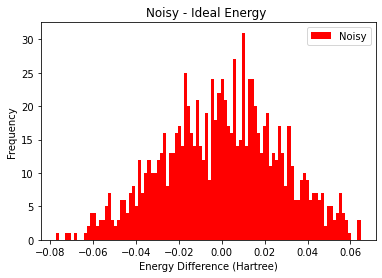

In [7]:
import numpy as np
import matplotlib.pyplot as plt

a = plt.figure()
plt.hist(diff_r, bins=100, color = "red", label = 'Noisy')
#plt.hist(diff_nr, bins=100, color = "lightcoral", label = 'Mitigated')
plt.title("Noisy - Ideal Energy ")
plt.xlabel("Energy Difference (Hartree)")
plt.ylabel("Frequency")
plt.legend()
plt.show()
a.savefig('SchnMethod_noisy.png', dpi = 1000)

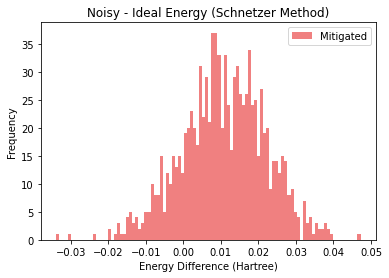

In [8]:
a = plt.figure()
#plt.hist(diff_r, bins=100, color = "red", label = 'Noisy')
plt.hist(diff_nr, bins=100, color = "lightcoral", label = 'Mitigated')
plt.title("Noisy - Ideal Energy (Schnetzer Method)")
plt.xlabel("Energy Difference (Hartree)")
plt.ylabel("Frequency")
plt.legend()
plt.show()
a.savefig('SchnMethod_Mitigated.png', dpi = 1000)

In [9]:
energies

[[[0.790792338192599, 2.0371430186514754, 1.4043447933441797],
  -0.6406791081845438,
  -0.6106022038876686,
  -0.6189579319811898],
 [[1.208805714628551, 0.9009883088888051, -2.401458411185909],
  -0.04152261404391874,
  -0.06942764334079375,
  -0.04691678681951711],
 [[1.531058772611872, 2.1598032866916768, 0.895751188796476],
  -0.34658804373141866,
  -0.34449453787204365,
  -0.32235207117532894],
 [[-2.4177430436380116, -0.7771710560474459, -1.456636723233046],
  -0.15952871755954376,
  -0.17591934255954378,
  -0.13375840362254557],
 [[0.2155586149016262, 2.8685911079520885, -1.883467033908227],
  0.24240438790920626,
  0.1856072687685813,
  0.25727698865373083],
 [[0.49457783895152874, 2.1841818830006607, 0.5516232945881452],
  -0.5779684148251687,
  -0.5716656804501687,
  -0.5771337561570139],
 [[-1.2643493809023405, 2.4562557855793745, -2.329750588900428],
  -0.1616810613095438,
  -0.1752508855282938,
  -0.1575930598687295],
 [[1.0798249197012808, -1.1993222074262027, -2.5941991

In [10]:
diff_r

[0.03007690429687515,
 -0.02790502929687501,
 0.002093505859375011,
 -0.01639062500000002,
 -0.05679711914062496,
 0.006302734374999952,
 -0.013569824218749998,
 0.01042163085937503,
 0.013316894531249956,
 -0.05209204101562501,
 -0.018833007812500004,
 -0.038685302734374996,
 -0.0064399414062500104,
 0.016067138671875036,
 0.023711425781250073,
 -0.007508544921874971,
 -0.018384277343750005,
 -0.020939453124999993,
 -0.04729711914062501,
 0.013447509765625032,
 0.020836181640625062,
 0.025355957031250043,
 -0.01858007812500001,
 0.015178222656250018,
 0.028457275390624925,
 -0.007386474609375027,
 -0.003912597656249961,
 0.02653027343749992,
 0.005304931640624955,
 -0.03259594726562498,
 0.043408935546875194,
 -0.020821777343750014,
 -0.028229003906249994,
 0.01045922851562503,
 -0.00024804687499996314,
 0.001984863281250082,
 -0.013004638671875002,
 0.042312744140625025,
 0.0051345214843749876,
 -0.02161474609374997,
 0.030901611328124967,
 0.013463378906250045,
 -0.02052514648437500

In [11]:
diff_nr

[0.02172117620335401,
 -0.005394172775598366,
 0.024235972556089724,
 0.02577031393699819,
 0.014872600744524567,
 0.0008346586681547974,
 0.004088001440814282,
 0.0020180858444827088,
 0.003353453799889272,
 -0.0034759824051816546,
 0.02246534103374924,
 0.001767225238953729,
 -0.005627987733878903,
 0.008783753052503063,
 0.00935962799299539,
 0.005069943516769704,
 0.007963642780830255,
 -0.010030247205051891,
 -0.008547086946256888,
 0.008527643634577142,
 0.007058989144536121,
 0.010580070374503925,
 -0.00337730046646062,
 0.02498583969468382,
 0.01622516133733143,
 -0.0011163287450396964,
 0.008803781943967526,
 0.022047036389174934,
 0.007524322804171368,
 0.013699303240723076,
 0.020541121627938086,
 0.01811202414490856,
 0.0065831458179894525,
 -0.007746162729414696,
 0.02992213974157404,
 0.004626297313797378,
 0.0058720259802116405,
 0.015540643839667134,
 0.026387074931231713,
 0.021852786362942647,
 0.017695902504025973,
 0.0021237559857676946,
 -0.014787759701236261,
 0.0

# Without Readout